Neste Modelo, a proposta será treinar o modelo com uma base de dados e testar com outra.

In [11]:
%pip install langdetect
%pip install pandas
%pip install spacy
%pip install scikit-learn
%pip install bs4
%pip install nltk
%pip install xgboost
%pip install catboost
%pip install transformers torch

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [12]:
from langdetect import detect
import pandas as pd
import spacy

In [13]:
# Carregar o modelo de idioma inglês
nlp = spacy.load("en_core_web_sm")

# Função para detectar o idioma usando o Spacy
def detect_language(text):
    doc = nlp(text)
    return doc.lang_

def contar_frases(text):
  if text is not None and len(text.strip()) > 0:  # Verifica se o texto não é nulo e contém conteúdo significativo
      doc = nlp(text)
      return len(list(doc.sents))
  else:
      return 0  # Retorna 0 se o texto for inválido ou vazio
        
# Função para contar o número de palavras em uma descrição usando spaCy
def contar_palavras(text):
    if text is not None and len(text.strip()) > 0:  # Verifica se o texto não é nulo e contém conteúdo significativo
        doc = nlp(text)
        return len(list(doc))
    else:
        return 0  # Retorna 0 se o texto for inválido ou vazio

In [14]:
from langdetect import detect as detect_language, LangDetectException
import os
import glob
import pandas as pd

def detectar_idioma(texto):
    try:
        return detect_language(texto)
    except LangDetectException:
        return 'unknown'

def carregar_dados(fonte_dados):
    # Lendo Dados
    dados_gerais = pd.read_csv(fonte_dados)
    
    # Aplicar a função de detecção de idioma à coluna 'description' e armazenar o resultado em uma nova coluna
    dados_gerais['lang'] = dados_gerais['description'].apply(lambda x: detectar_idioma(str(x)))
    
    # Filtrar apenas os registros onde o idioma detectado é inglês
    dados = dados_gerais[dados_gerais['lang'] == 'en']
    
    # Filtrar registros com storypoint maior que zero e não nulo
    dados = dados[dados['storypoint'].notnull() & (dados['storypoint'] > 0)]
    
    # Selecionar apenas as colunas 'description', 'storypoint' e 'issuekey'
    dados_filtrados = dados[['description', 'storypoint', 'issuekey']]
    
    return dados_filtrados

def carregar_todos_dados(diretorio_pasta):
    lista_datasets = []
    # Encontrar todos os arquivos .csv no diretório especificado
    arquivos_csv = glob.glob(os.path.join(diretorio_pasta, "*.csv"))
    
    for arquivo in arquivos_csv:
        dados_filtrados = carregar_dados(arquivo)
        nome_dataset = os.path.basename(arquivo)  # Obtendo o nome do arquivo
        dados_filtrados['dataset_name'] = nome_dataset  # Adicionando uma nova coluna com o nome do dataset
        lista_datasets.append(dados_filtrados)
    
    return lista_datasets

diretorio = 'D:\\Mestrado\\Python\\Projeto\\Datasets\\JIRA-Estimation-Prediction\\storypoint\\IEEE TSE2018\\dataset'
datasets = carregar_todos_dados(diretorio)

# Ver o primeiro DataFrame da lista
datasets[0].head()


,description,storypoint,issuekey,dataset_name
2,Some web work actions have commands that have ...,5,GHS-1681,jirasoftware.csv
3,Some web work actions have commands that have ...,5,JSW-1681,jirasoftware.csv
4,"When the error is ""Invalid Project"" add detail...",2,GHS-1819,jirasoftware.csv
5,"When the error is ""Invalid Project"" add detail...",2,JSW-1819,jirasoftware.csv
6,When using Greenhopper ranking field in conjun...,20,GHS-1882,jirasoftware.csv


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tqdm import tqdm
from unicodedata import normalize

In [16]:
from bs4 import BeautifulSoup
import re
import nltk
from nltk.stem import PorterStemmer
from collections import Counter
from tqdm import tqdm

def preprocessar_descricao(list_descricao):
    descricao_2 = []

    with tqdm(total=len(list_descricao), desc='Processando Descrição') as pbar:
        for descricao in list_descricao:
            descricao_processada = BeautifulSoup(descricao, 'html.parser').get_text()
            doc = nlp(descricao_processada)
            tokens = [t.lemma_.lower() for t in doc if t.pos_ != 'PUNCT'
                        and len(t.lemma_) > 1 and not t.is_stop]
            descricao_processada = ' '.join(tokens).strip()
            descricao_2.append(descricao_processada)
            pbar.update(1)

    return descricao_2

def preprocessar_todos_datasets(lista_datasets):
    for dados_filtrados in lista_datasets:
        dados_filtrados['treated_description'] = preprocessar_descricao(dados_filtrados['description'].values)

    return lista_datasets

# Exemplo de uso
datasets = preprocessar_todos_datasets(datasets)

# Verificar a nova coluna no primeiro dataset
datasets[0].head()


Processando Descrição:   7%|▋         | 21/282 [00:00<00:04, 57.47it/s]C:\Users\rodri\AppData\Local\Temp\ipykernel_20208\385981844.py:13: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  descricao_processada = BeautifulSoup(descricao, 'html.parser').get_text()
Processando Descrição:   9%|▊         | 96/1123 [00:01<00:14, 70.57it/s]C:\Users\rodri\AppData\Local\Temp\ipykernel_20208\385981844.py:13: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  descricao_processada = BeautifulSoup(descricao, 'html.parser').get_text()
Processando Descrição:  41%|████      | 459/1123 [00:07<00:11, 57.29it/s]C:\Users\rodri\AppData\Local\Temp\ipykernel_20208\385981844.py:13: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like r

,description,storypoint,issuekey,dataset_name,treated_description
2,Some web work actions have commands that have ...,5,GHS-1681,jirasoftware.csv,web work action command generic alias update s...
3,Some web work actions have commands that have ...,5,JSW-1681,jirasoftware.csv,web work action command generic alias update s...
4,"When the error is ""Invalid Project"" add detail...",2,GHS-1819,jirasoftware.csv,error invalid project add detail project confi...
5,"When the error is ""Invalid Project"" add detail...",2,JSW-1819,jirasoftware.csv,error invalid project add detail project confi...
6,When using Greenhopper ranking field in conjun...,20,GHS-1882,jirasoftware.csv,greenhopper ranking field conjunction jiraissu...



Analisando Dataset 1: jirasoftware.csv


Total Examples: 282 -- 282


Min Estimation: 1
Max Estimation: 20


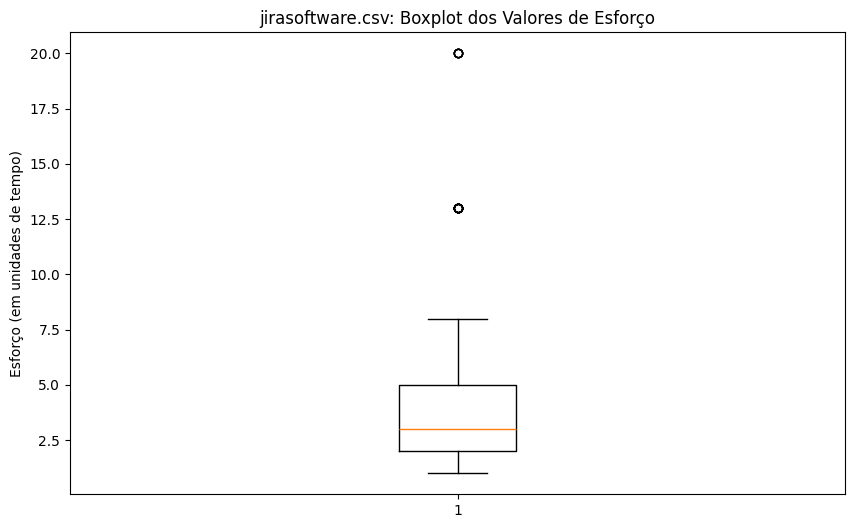

Outliers:
[20 20 13 13 13 13 13 20 20 13 13 20 13 13 13 13 13 13]
Lower Bound: -2.5
Upper Bound: 9.5

Analisando Dataset 2: talenddataquality.csv


Total Examples: 1123 -- 1123


Min Estimation: 1
Max Estimation: 40


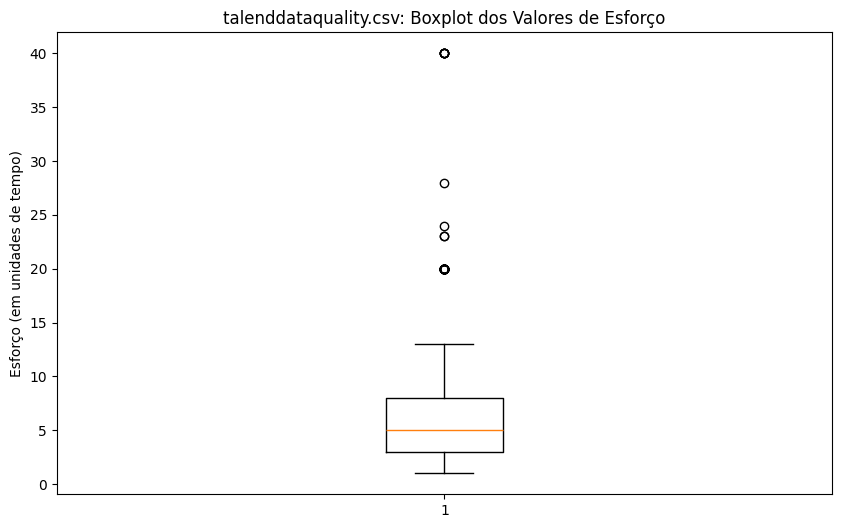

Outliers:
[20 40 20 20 40 28 40 20 20 20 40 23 40 23 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 40 20 20 20 20 20 20 24
 20 20 20]
Lower Bound: -4.5
Upper Bound: 15.5

Analisando Dataset 3: talendesb.csv


Total Examples: 766 -- 766


Min Estimation: 1
Max Estimation: 13


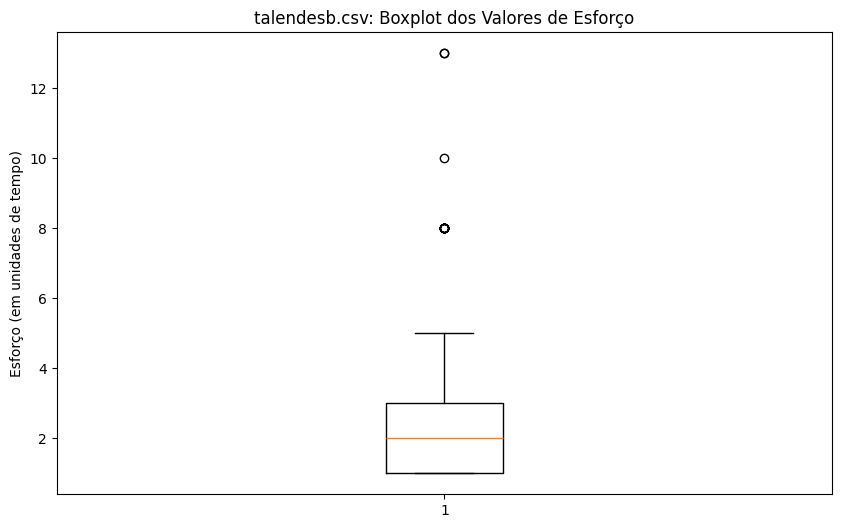

Outliers:
[ 8  8  8 13  8  8  8  8  8  8 10  8 13  8  8  8]
Lower Bound: -2.0
Upper Bound: 6.0


In [17]:
import numpy as np
import matplotlib.pyplot as plt

def analisar_datasets(lista_datasets):
    for i, dados_filtrados in enumerate(lista_datasets):
        dataset_name = dados_filtrados['dataset_name'].iloc[0]  # Obtendo o nome do dataset
        print(f'\nAnalisando Dataset {i + 1}: {dataset_name}\n')

        descriptions = dados_filtrados['treated_description'].values
        effort_estimations = dados_filtrados['storypoint'].values

        min_effort = min(effort_estimations)
        max_effort = max(effort_estimations)

        effort_estimations = np.array(effort_estimations)

        print(f'\nTotal Examples: {len(descriptions)} -- {len(effort_estimations)}\n')
        print(f'\nMin Estimation: {min_effort}')
        print(f'Max Estimation: {max_effort}')

        # Boxplot dos valores de esforço
        plt.figure(figsize=(10, 6))
        plt.boxplot(effort_estimations)
        plt.title(f'{dataset_name}: Boxplot dos Valores de Esforço')
        plt.ylabel('Esforço (em unidades de tempo)')
        plt.show()

        # Calcular os quartis e o IQR
        Q1 = np.percentile(effort_estimations, 25)
        Q3 = np.percentile(effort_estimations, 75)
        IQR = Q3 - Q1

        # Determinar os limites inferior e superior
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificar outliers
        outliers = effort_estimations[(effort_estimations < lower_bound) | (effort_estimations > upper_bound)]

        print(f"Outliers:\n{outliers}")
        print(f"Lower Bound: {lower_bound}")
        print(f"Upper Bound: {upper_bound}")

# Exemplo de uso
analisar_datasets(datasets)


Processando Dataset 1: jirasoftware.csv


Total Examples After Removing Outliers: 264 -- 264


Total Examples Removed: 18



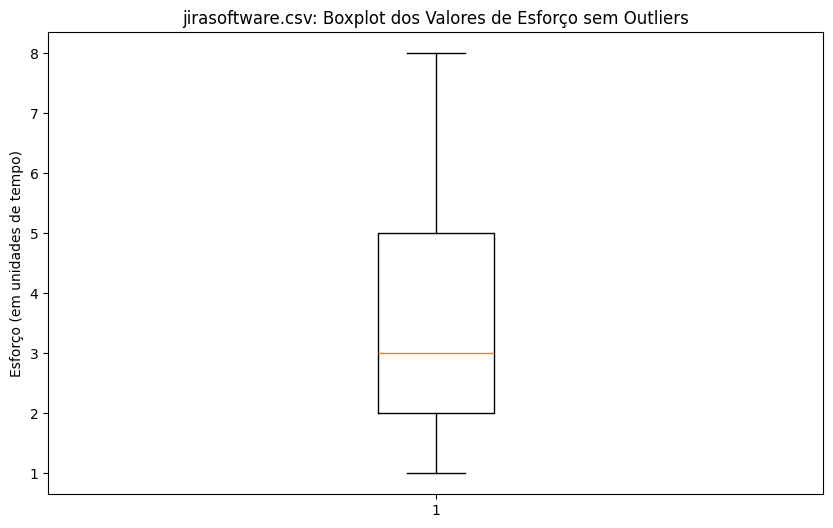


Processando Dataset 2: talenddataquality.csv


Total Examples After Removing Outliers: 1072 -- 1072


Total Examples Removed: 51



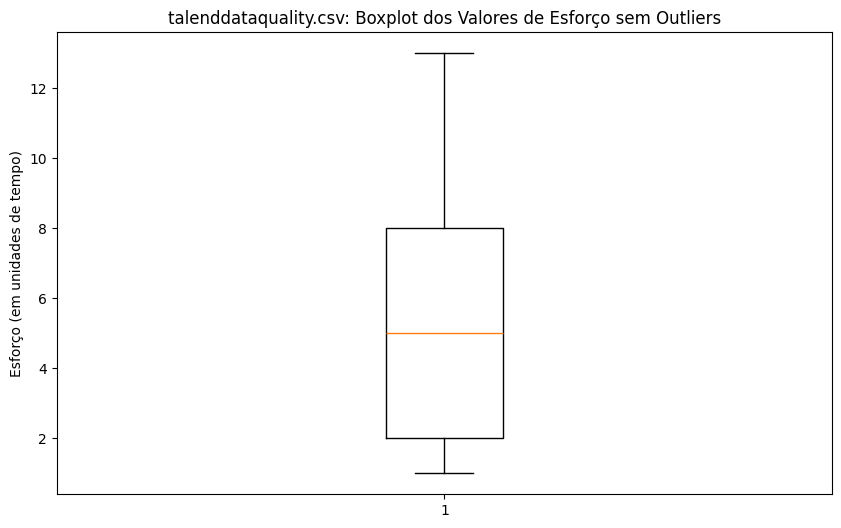


Processando Dataset 3: talendesb.csv


Total Examples After Removing Outliers: 750 -- 750


Total Examples Removed: 16



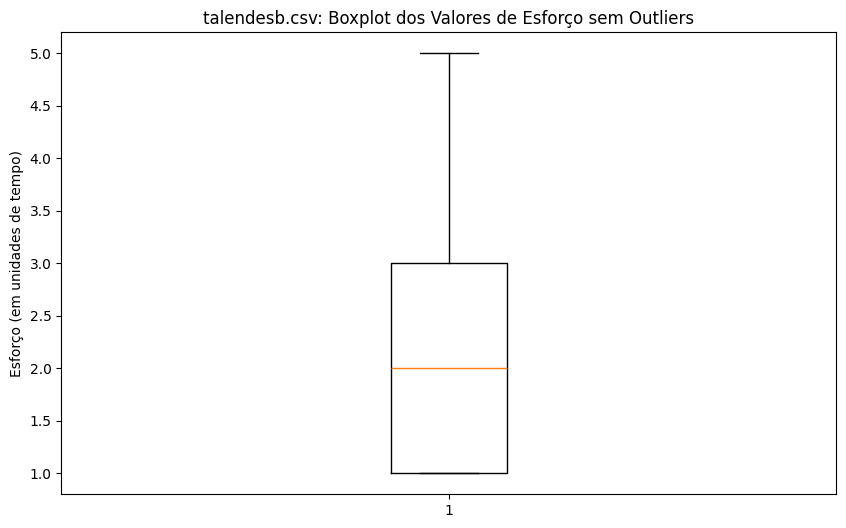

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def remover_outliers_e_filtrar(lista_datasets):
    nova_lista_datasets = []

    for i, dados_filtrados in enumerate(lista_datasets):
        dataset_name = dados_filtrados['dataset_name'].iloc[0]  # Obtendo o nome do dataset
        print(f'\nProcessando Dataset {i + 1}: {dataset_name}\n')

        descriptions = dados_filtrados['treated_description'].values
        effort_estimations = dados_filtrados['storypoint'].values

        # Calcular os quartis e o IQR
        Q1 = np.percentile(effort_estimations, 25)
        Q3 = np.percentile(effort_estimations, 75)
        IQR = Q3 - Q1

        # Determinar os limites inferior e superior
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remover os outliers
        mask = (effort_estimations >= lower_bound) & (effort_estimations <= upper_bound)
        filtered_effort_estimations = effort_estimations[mask]
        filtered_descriptions = descriptions[mask]

        print(f'\nTotal Examples After Removing Outliers: {len(filtered_descriptions)} -- {len(filtered_effort_estimations)}\n')
        print(f'\nTotal Examples Removed: {len(effort_estimations) - len(filtered_effort_estimations)}\n')

        # Criar um novo DataFrame sem os outliers
        dados_filtrados_sem_outliers = dados_filtrados[mask].copy()

        # Adicionar o DataFrame sem outliers à nova lista
        nova_lista_datasets.append(dados_filtrados_sem_outliers)

        # Boxplot dos valores de esforço sem outliers
        plt.figure(figsize=(10, 6))
        plt.boxplot(filtered_effort_estimations)
        plt.title(f'{dataset_name}: Boxplot dos Valores de Esforço sem Outliers')
        plt.ylabel('Esforço (em unidades de tempo)')
        plt.show()

    return nova_lista_datasets

# Exemplo de uso
datasets_sem_outliers = remover_outliers_e_filtrar(datasets)


In [19]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, root_mean_squared_error
from scipy.stats import pearsonr
import torch
from transformers import RobertaTokenizer, RobertaModel
from sklearn.base import BaseEstimator, RegressorMixin
from datetime import datetime

In [20]:
def avaliar_modelos_em_datasets(lista_datasets):
    models = [
        ('Linear Regression', LinearRegression(), None),
        ('Ridge Regression', Ridge(), {'regressor__alpha': [0.1, 1.0, 10.0, 100.0]}),
        ('Lasso Regression', Lasso(max_iter=100000, tol=0.01), {'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]}),
        ('ElasticNet Regression', ElasticNet(max_iter=100000), {'regressor__alpha': [0.1, 1.0, 10.0, 100.0], 'regressor__l1_ratio': [0.1, 0.5, 0.9]}),
        ('SVR', SVR(), {'regressor__C': [0.1, 1.0, 10.0], 'regressor__epsilon': [0.01, 0.1, 1.0]}),
        ('KNN', KNeighborsRegressor(), {'regressor__n_neighbors': [3, 5, 7, 9]}),
        ('Decision Tree', DecisionTreeRegressor(), {'regressor__max_depth': [None, 10, 20, 30]}),
        ('XGBoost', XGBRegressor(), {'regressor__n_estimators': [100, 200], 'regressor__learning_rate': [0.01, 0.1, 0.3]}),
        ('CatBoost', CatBoostRegressor(silent=True), {'regressor__iterations': [100, 200], 'regressor__learning_rate': [0.01, 0.1, 0.3]})
    ]

    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1, 1), max_features=1_000)),
        ('normalizer', Normalizer()),  # Normalizar os dados
        ('regressor', None)
    ])

    resultados_completos = []

    # Iterar sobre cada dataset para treinamento e teste
    for i, dados_treino in enumerate(lista_datasets):
        dataset_treino_name = dados_treino['dataset_name'].iloc[0]
        descriptions_treino = dados_treino['treated_description'].values
        effort_estimations_treino = dados_treino['storypoint'].values

        # Usar os outros datasets para teste
        for j, dados_teste in enumerate(lista_datasets):
            if i == j:
                continue  # Evitar usar o mesmo dataset para treino e teste
            
            dataset_teste_name = dados_teste['dataset_name'].iloc[0]
            descriptions_teste = dados_teste['treated_description'].values
            effort_estimations_teste = dados_teste['storypoint'].values

            results = {
                'Train Dataset': [],
                'Test Dataset': [],
                'Model': [],
                'MAE_Mean': [],
                'R2_Mean': [],
                'RMSE_Mean': [],
                'Pearson_Corr_Mean': [],
                'Execution_DateTime': []
            }

            for name, model, param_grid in models:
                pipeline.set_params(regressor=model)
                print(f"\nTreinando com {dataset_treino_name} e testando em {dataset_teste_name} com o modelo {name}")
                regressor = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error') if param_grid else pipeline

                # Treinar o modelo com o dataset de treino
                regressor.fit(descriptions_treino, effort_estimations_treino)

                # Fazer predições com o dataset de teste
                y_pred = regressor.predict(descriptions_teste)

                # Calcular as métricas de avaliação
                mae = mean_absolute_error(effort_estimations_teste, y_pred)
                r2 = r2_score(effort_estimations_teste, y_pred)
                mse = mean_squared_error(effort_estimations_teste, y_pred)
                rmse = np.sqrt(mse)

                try:
                    pearson_corr, _ = pearsonr(effort_estimations_teste, y_pred)
                except Exception as e:
                    print(f"Warning: {e}")
                    pearson_corr = float('nan')

                # Armazenar os resultados
                results['Train Dataset'].append(dataset_treino_name)
                results['Test Dataset'].append(dataset_teste_name)
                results['Model'].append(name)
                results['MAE_Mean'].append(mae)
                results['R2_Mean'].append(r2)
                results['RMSE_Mean'].append(rmse)
                results['Pearson_Corr_Mean'].append(pearson_corr)
                results['Execution_DateTime'].append(datetime.now())

            # Adiciona os resultados do par de datasets atual à lista completa de resultados
            resultados_completos.append(pd.DataFrame(results))

    # Combina todos os resultados em um único DataFrame
    resultados_finais = pd.concat(resultados_completos, ignore_index=True)
    
    return resultados_finais

def exportar_resultados_para_csv(resultados_finais, filename):
    # Verifica se o arquivo já existe
    if os.path.exists(filename):
        # Faz o append dos novos resultados
        resultados_finais.to_csv(filename, mode='a', header=False, index=False)
    else:
        # Cria um novo arquivo com o cabeçalho
        resultados_finais.to_csv(filename, mode='w', header=True, index=False)

# Exemplo de uso
resultados_finais = avaliar_modelos_em_datasets(datasets_sem_outliers)

# Exportar os resultados para um arquivo CSV
exportar_resultados_para_csv(resultados_finais, 'resultados_modelos_01.csv')

# Mostrar os resultados
print("\nResultados Completos:")
resultados_finais.head()


Treinando com jirasoftware.csv e testando em talenddataquality.csv com o modelo Linear Regression

Treinando com jirasoftware.csv e testando em talenddataquality.csv com o modelo Ridge Regression

Treinando com jirasoftware.csv e testando em talenddataquality.csv com o modelo Lasso Regression


C:\Users\rodri\AppData\Local\Temp\ipykernel_20208\3116367998.py:66: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, _ = pearsonr(effort_estimations_teste, y_pred)



Treinando com jirasoftware.csv e testando em talenddataquality.csv com o modelo ElasticNet Regression

Treinando com jirasoftware.csv e testando em talenddataquality.csv com o modelo SVR

Treinando com jirasoftware.csv e testando em talenddataquality.csv com o modelo KNN

Treinando com jirasoftware.csv e testando em talenddataquality.csv com o modelo Decision Tree

Treinando com jirasoftware.csv e testando em talenddataquality.csv com o modelo XGBoost

Treinando com jirasoftware.csv e testando em talenddataquality.csv com o modelo CatBoost

Treinando com jirasoftware.csv e testando em talendesb.csv com o modelo Linear Regression

Treinando com jirasoftware.csv e testando em talendesb.csv com o modelo Ridge Regression

Treinando com jirasoftware.csv e testando em talendesb.csv com o modelo Lasso Regression


C:\Users\rodri\AppData\Local\Temp\ipykernel_20208\3116367998.py:66: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, _ = pearsonr(effort_estimations_teste, y_pred)



Treinando com jirasoftware.csv e testando em talendesb.csv com o modelo ElasticNet Regression

Treinando com jirasoftware.csv e testando em talendesb.csv com o modelo SVR

Treinando com jirasoftware.csv e testando em talendesb.csv com o modelo KNN

Treinando com jirasoftware.csv e testando em talendesb.csv com o modelo Decision Tree

Treinando com jirasoftware.csv e testando em talendesb.csv com o modelo XGBoost

Treinando com jirasoftware.csv e testando em talendesb.csv com o modelo CatBoost

Treinando com talenddataquality.csv e testando em jirasoftware.csv com o modelo Linear Regression

Treinando com talenddataquality.csv e testando em jirasoftware.csv com o modelo Ridge Regression

Treinando com talenddataquality.csv e testando em jirasoftware.csv com o modelo Lasso Regression

Treinando com talenddataquality.csv e testando em jirasoftware.csv com o modelo ElasticNet Regression

Treinando com talenddataquality.csv e testando em jirasoftware.csv com o modelo SVR

Treinando com tal

,Train Dataset,Test Dataset,Model,MAE_Mean,R2_Mean,RMSE_Mean,Pearson_Corr_Mean,Execution_DateTime
0,jirasoftware.csv,talenddataquality.csv,Linear Regression,3.301116,-0.339312,4.301225,0.121176,2024-08-26 10:21:32.004509
1,jirasoftware.csv,talenddataquality.csv,Ridge Regression,3.163208,-0.247131,4.150565,0.120775,2024-08-26 10:21:32.413032
2,jirasoftware.csv,talenddataquality.csv,Lasso Regression,3.136512,-0.189981,4.054350,NaN,2024-08-26 10:21:33.232478
3,jirasoftware.csv,talenddataquality.csv,ElasticNet Regression,3.138145,-0.193167,4.059773,0.090178,2024-08-26 10:21:34.310683
4,jirasoftware.csv,talenddataquality.csv,SVR,3.158584,-0.244839,4.146750,0.118158,2024-08-26 10:21:35.762673
